In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv("tips (data for regression problem).csv")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [23]:
df = pd.get_dummies(df, drop_first=True)
df

,total_bill,tip,size,time_Lunch,day_Sat,day_Sun,day_Thur,sex_Male,smoker_Yes
0,16.99,1.01,2,False,False,True,False,False,False
1,10.34,1.66,3,False,False,True,False,True,False
2,21.01,3.50,3,False,False,True,False,True,False
3,23.68,3.31,2,False,False,True,False,True,False
4,24.59,3.61,4,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,False,True,False,False,True,False
240,27.18,2.00,2,False,True,False,False,False,True
241,22.67,2.00,2,False,True,False,False,True,True
242,17.82,1.75,2,False,True,False,False,True,False


In [24]:
X = df.drop('tip', axis=1)
y = df['tip']

In [25]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
linear_model = LinearRegression()

# Fit the model
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = mse_linear ** 0.5
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression RMSE: {rmse_linear}, R²: {r2_linear}")

Linear Regression RMSE: 0.8386635807900631, R²: 0.43730181943482493


In [29]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate Ridge model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = mse_ridge ** 0.5
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge Regression RMSE: {rmse_ridge}, R²: {r2_ridge}")

Ridge Regression RMSE: 0.8371067562274285, R²: 0.4393889716178486


In [30]:
# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate Lasso model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = mse_lasso ** 0.5
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression RMSE: {rmse_lasso}, R²: {r2_lasso}")

Lasso Regression RMSE: 0.768669542129225, R²: 0.5273068720881755


In [31]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions
y_pred_tree = tree_model.predict(X_test)

# Evaluate the model
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = mse_tree ** 0.5
r2_tree = r2_score(y_test, y_pred_tree)
print(f"Decision Tree RMSE: {rmse_tree}, R²: {r2_tree}")

Decision Tree RMSE: 1.048931429053941, R²: 0.11977410760803109


In [32]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest RMSE: {rmse_rf}, R²: {r2_rf}")

Random Forest RMSE: 0.9581164625004034, R²: 0.265593440052869


In [33]:
from sklearn.svm import SVR

# Initialize the SVR model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

# Make predictions
y_pred_svr = svr_model.predict(X_test)

# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = mse_svr ** 0.5
r2_svr = r2_score(y_test, y_pred_svr)
print(f"SVR RMSE: {rmse_svr}, R²: {r2_svr}")

SVR RMSE: 0.7296412174909251, R²: 0.5740891915042663


In [34]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = mse_knn ** 0.5
r2_knn = r2_score(y_test, y_pred_knn)
print(f"KNN RMSE: {rmse_knn}, R²: {r2_knn}")

KNN RMSE: 0.9361477294896203, R²: 0.29888587066985495


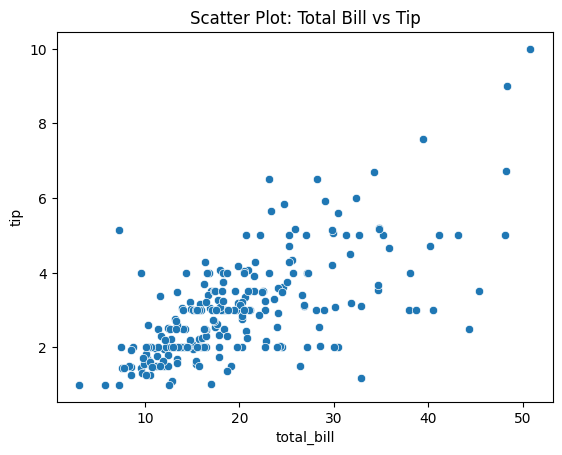

In [35]:
# Scatter plot for 'total_bill' vs 'tip'
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title('Scatter Plot: Total Bill vs Tip')
plt.show()

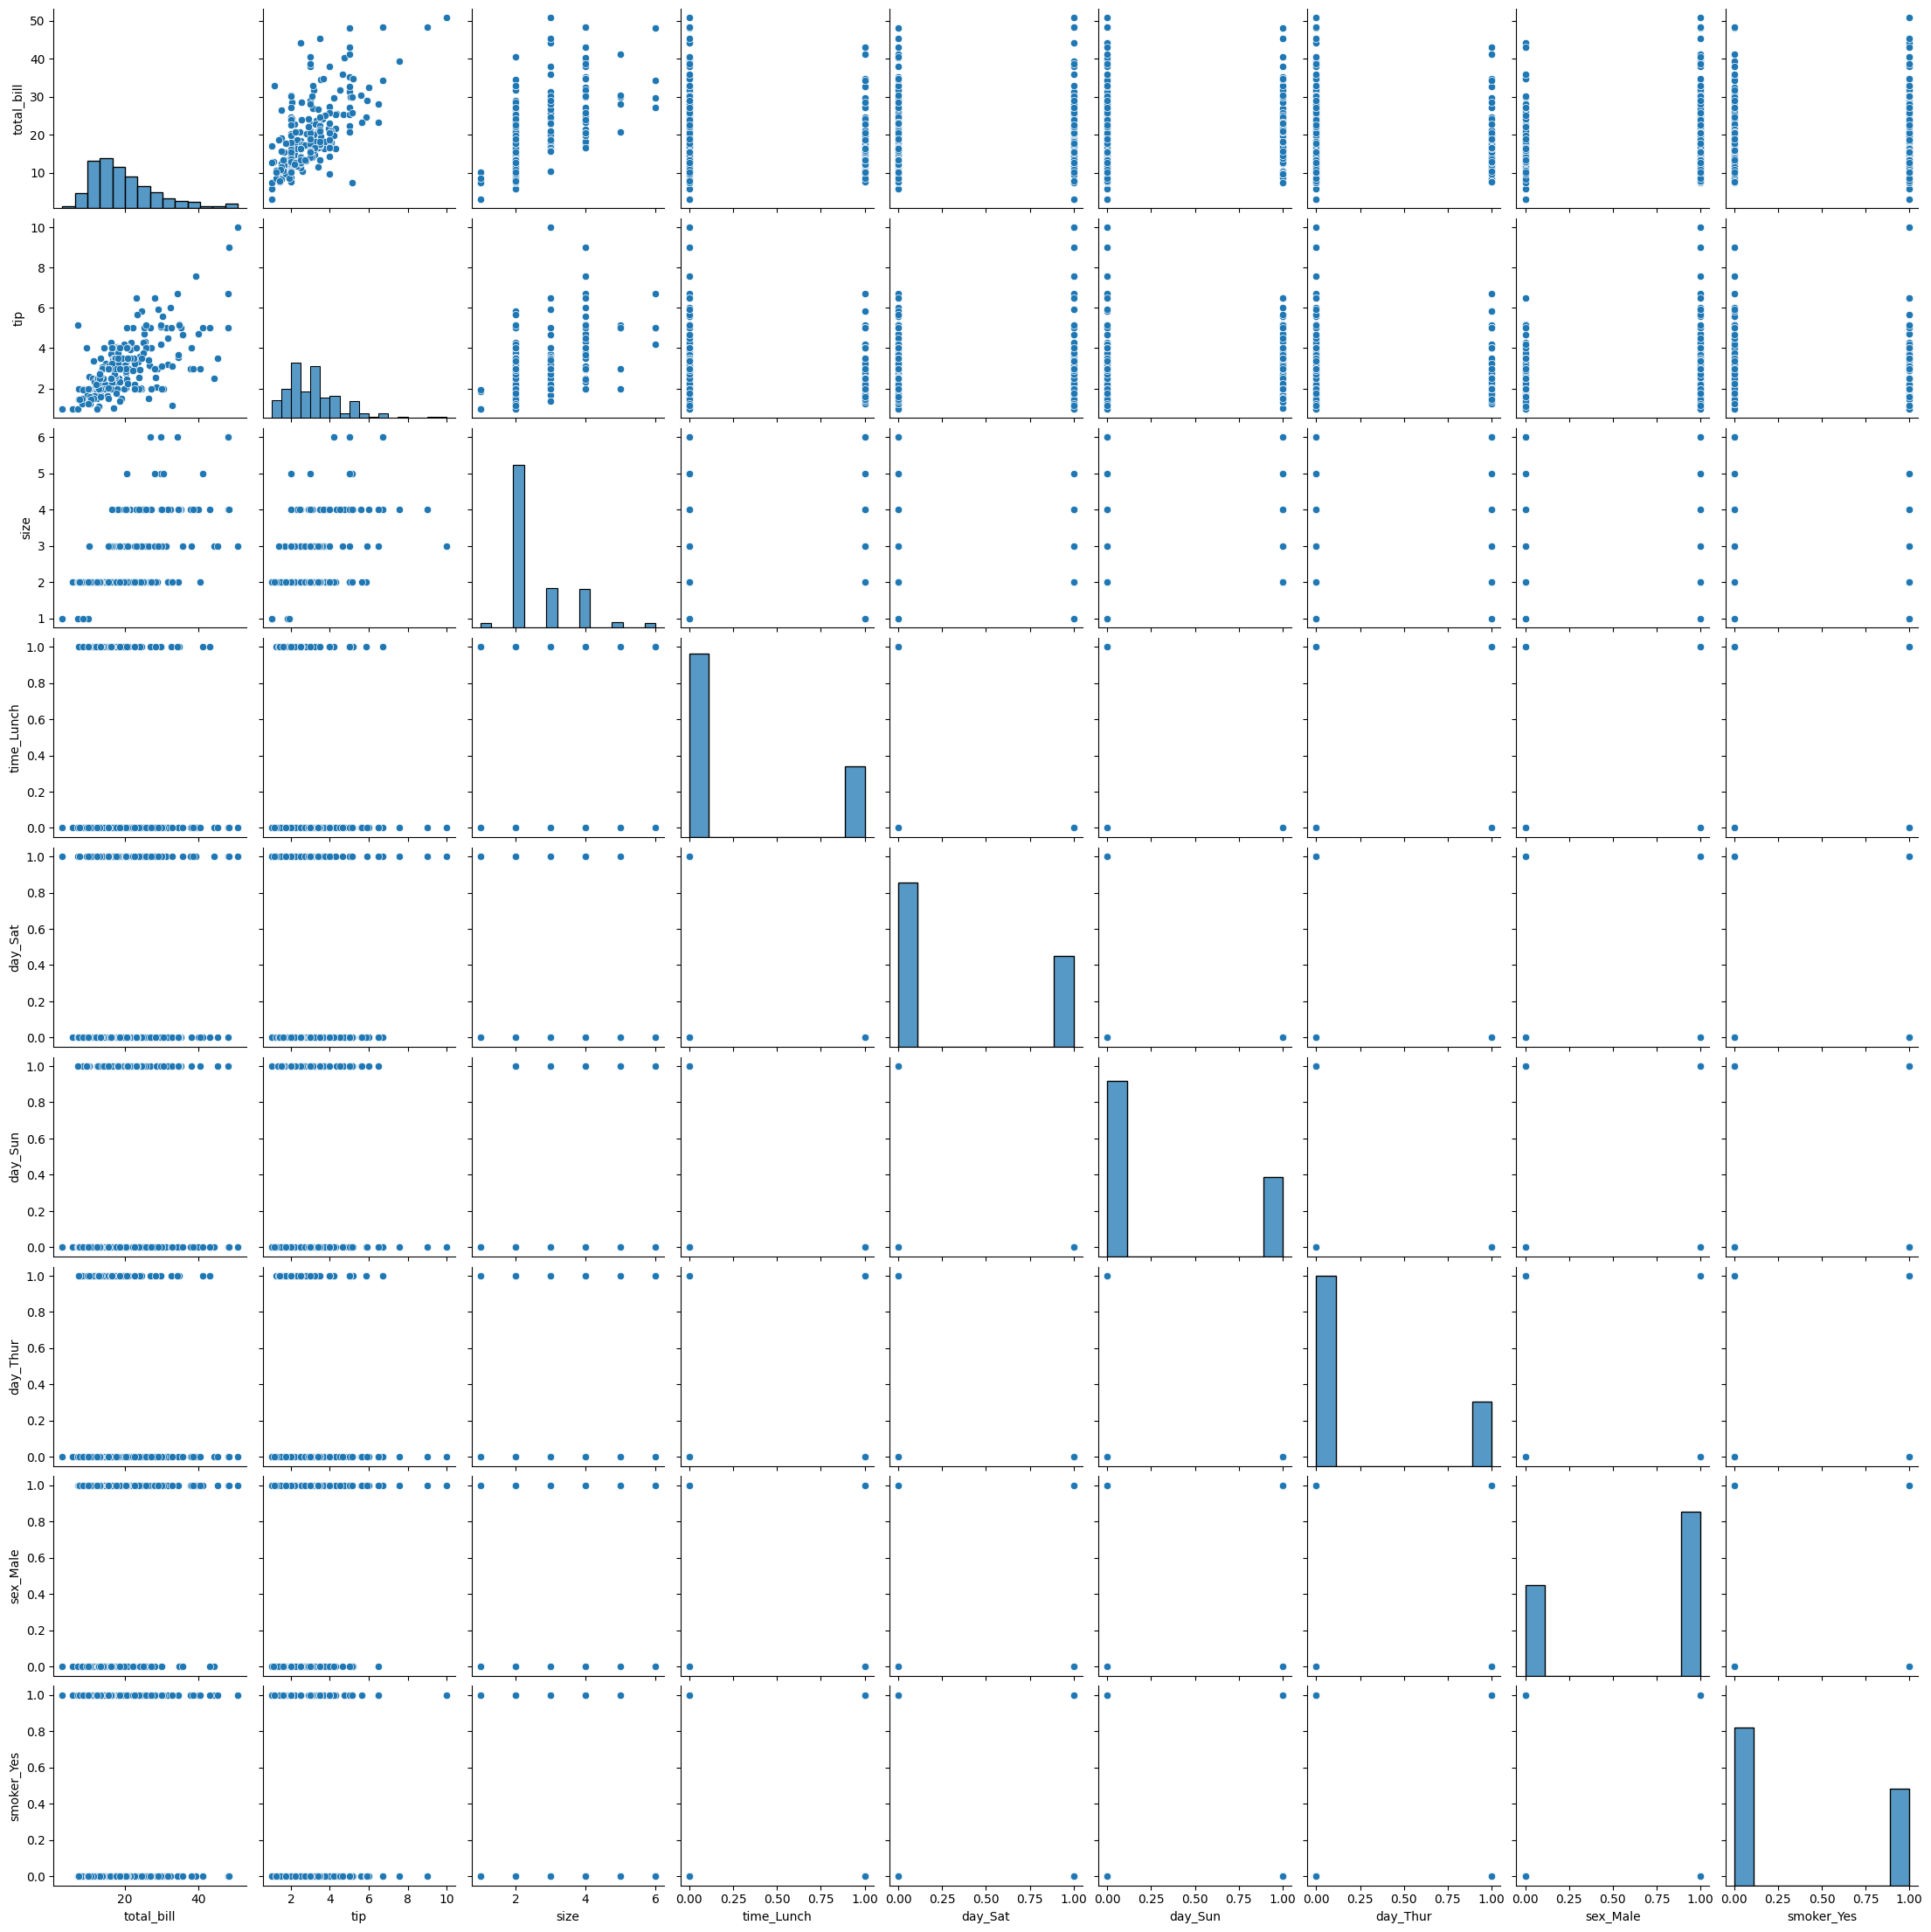

In [38]:
sns.pairplot(df)
plt.show()

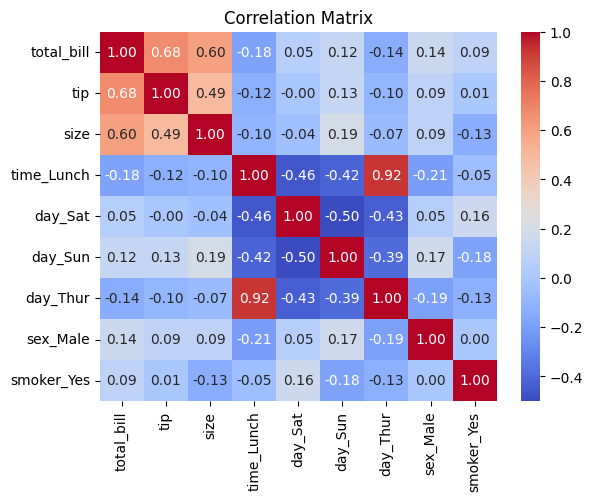

In [42]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [60]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow

model = ols("tip ~ total_bill + size", data=df).fit()
rainbow_test_result = linear_rainbow(model)
print(f"Rainbow Test Statistic: {rainbow_test_result[0]}")
print(f"Rainbow Test p-value: {rainbow_test_result[1]}")

Rainbow Test Statistic: 1.1902656646832817
Rainbow Test p-value: 0.17048935693447642


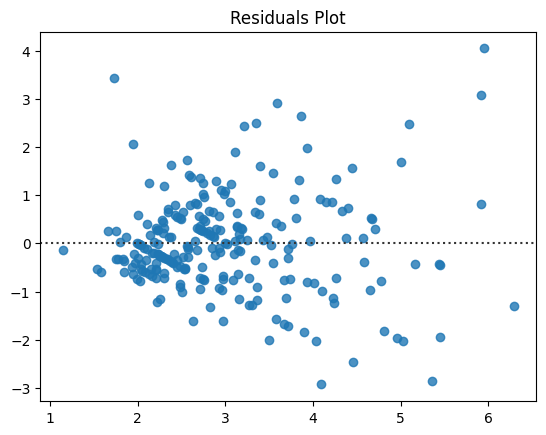

In [63]:
sns.residplot(x=model.fittedvalues, y=model.resid, line_kws={'color': 'black'})
plt.title("Residuals Plot")
plt.show()